In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
windspeed = pd.read_csv('src_wings_meteorology_windspeed_snapshot_2023_08_02.csv')
wind_info = pd.read_csv('src_wings_meteorology_station_summary_snapshot_2023_08_02.csv')
weather_station = pd.read_csv('gis_weatherstation_shape_2024_10_04.csv')

In [3]:
merged_df = pd.merge(windspeed, wind_info, on='station')

final_df = pd.merge(merged_df, weather_station, left_on='station', right_on='weatherstationcode')

In [4]:
final_df['psps'] = (final_df['wind_speed'] > final_df['alert']) & (final_df['vri'] == 'H')

C:\Users\bsath\AppData\Local\Temp\ipykernel_24540\261765976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='station', y='wind_speed', data=final_df, palette='coolwarm')


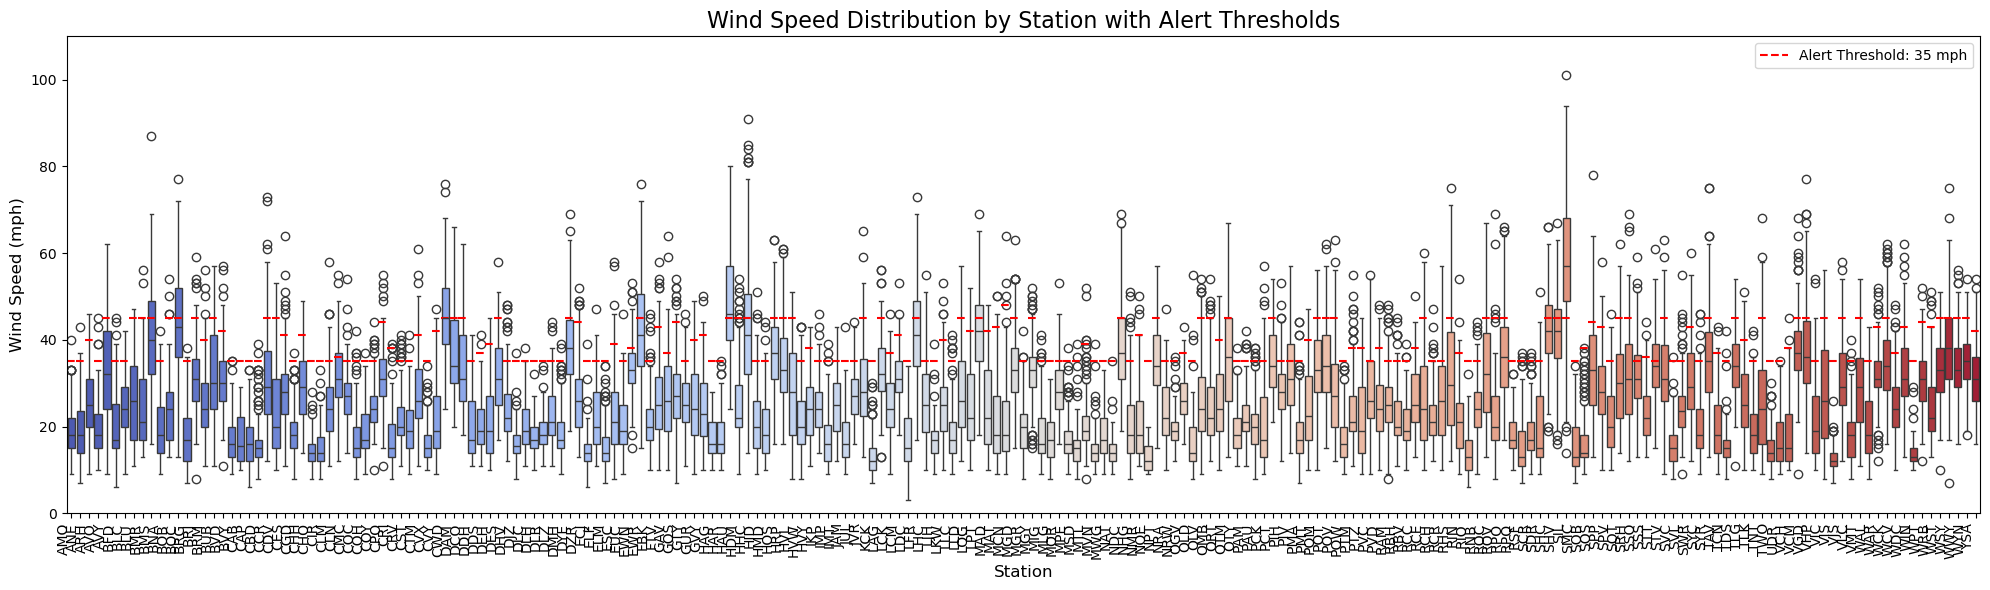

In [5]:
plt.figure(figsize=(20, 6))

sns.boxplot(x='station', y='wind_speed', data=final_df, palette='coolwarm')

stations = final_df['station'].unique()
for station in stations:
    station_data = final_df[final_df['station'] == station]
    alert_threshold = station_data['alert'].iloc[0]
    
    plt.axhline(y=alert_threshold, color='red', linestyle='--', 
                xmin=(list(stations).index(station)) / len(stations), 
                xmax=(list(stations).index(station) + 1) / len(stations),
                label=f'Alert Threshold: {alert_threshold} mph' if station == stations[0] else "")

plt.title('Wind Speed Distribution by Station with Alert Thresholds', fontsize=16)
plt.xlabel('Station', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.ylim(0, 110)
plt.xticks(rotation=90, ha='right')

plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\bsath\AppData\Local\Temp\ipykernel_24540\2884008704.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='station', y='psps', data=psps_prob_by_station, palette='coolwarm')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

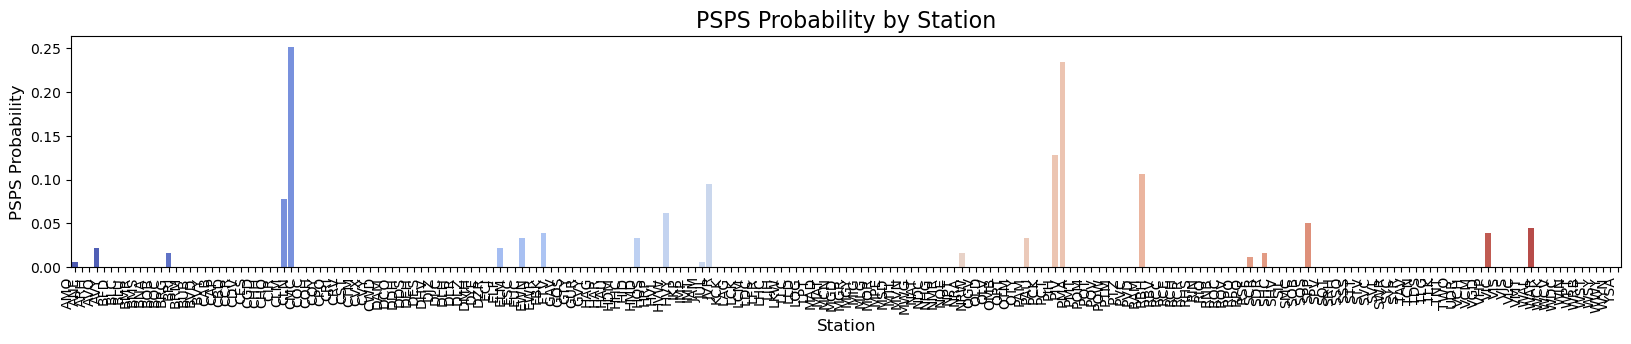

In [6]:
psps_prob_by_station = final_df.groupby('station')['psps'].mean().reset_index()

plt.figure(figsize=(20, 3))

sns.barplot(x='station', y='psps', data=psps_prob_by_station, palette='coolwarm')

plt.title('PSPS Probability by Station', fontsize=16)
plt.xlabel('Station', fontsize=12)
plt.ylabel('PSPS Probability', fontsize=12)

plt.xticks(rotation=90, ha='right')

In [7]:
psps_prob_by_station[psps_prob_by_station['psps'] > 0]

,station,psps
0,AMO,0.005587
3,AVO,0.022346
13,BRG,0.016760
29,CLM,0.078212
30,CLN,0.251397
59,ELF,0.022346
62,EUC,0.033520
65,FBK,0.039106
78,HMD,0.033520
82,HVW,0.061453
